In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [3]:
data = pd.read_hdf('Data.h5')

[229.7925415  230.72361755 229.07003784 230.28366089 230.90393066
 228.7431488  230.30323792 229.46205139 230.13388062 231.04176331
 229.61515808 230.57025146 230.49464417 229.51676941 230.77607727
 229.44268799 230.24752808 230.35282898 229.40435791 230.85600281
 229.80891418 230.81312561 231.41967773 229.71987915 230.41783142
 229.43345642 229.73928833 230.17721558 229.04884338 230.39424133
 228.76031494 229.81604004 230.34934998 231.61183167 229.72593689
 229.99284363 229.6521759  230.30516052 231.26522827 229.95309448
 229.99053955 229.49090576 229.15327454 229.75860596 230.60203552
 231.45672607 231.38891602 228.59004211 230.14680481 230.43441772
 228.7460022  230.21827698 230.11949158 229.82933044 229.16285706
 229.53604126 229.41111755 230.59407043 230.83534241 229.95436096]
230.26968383789062


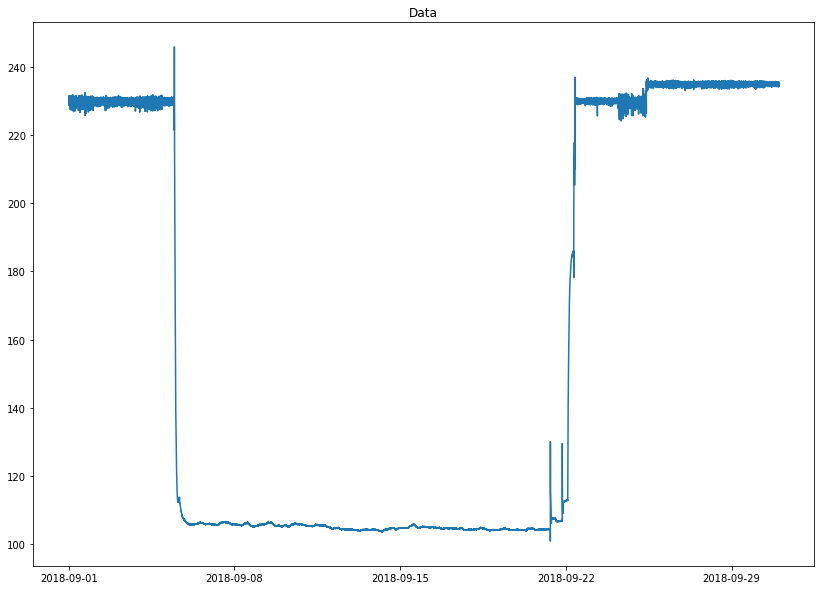

In [34]:
prev_steps = 60
i = np.random.randint(data.shape[1])
i = 75
plt.figure(figsize=(14,10))
plt.title('Data')
plt.plot(data.index, data.iloc[:,i])

X = []
y = []
for start in range(len(data.iloc[:,i][:-prev_steps])):
    tmp = data.iloc[:,i][start:start+prev_steps]
    X.append(tmp)
    y.append(data.iloc[:,i][start+prev_steps])
X = np.array(X)
y = np.array(y)
print(X[0])
print(y[0])

In [6]:
np.save('X', X)

In [35]:
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(prev_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
X = X.reshape(X.shape[0], X.shape[1], 1)
model.fit(X,y,epochs=20,batch_size=20)

Epoch 1/20
43140/43140 [==============================] - 26s 607us/step - loss: 15444.1767
Epoch 2/20
43140/43140 [==============================] - 26s 604us/step - loss: 5304.1866
Epoch 3/20
43140/43140 [==============================] - 26s 604us/step - loss: 19.7847
Epoch 4/20
43140/43140 [==============================] - 26s 604us/step - loss: 17.8607
Epoch 5/20
43140/43140 [==============================] - 26s 605us/step - loss: 15.4936
Epoch 6/20
43140/43140 [==============================] - 26s 606us/step - loss: 11.7759
Epoch 7/20
43140/43140 [==============================] - 26s 606us/step - loss: 10.7328
Epoch 8/20
43140/43140 [==============================] - 26s 606us/step - loss: 13.7072
Epoch 9/20
43140/43140 [==============================] - 26s 605us/step - loss: 11.9363
Epoch 10/20
43140/43140 [==============================] - 26s 607us/step - loss: 16.1951
Epoch 11/20
43140/43140 [==============================] - 26s 609us/step - loss: 31.7539
Epoch 12/20
43

In [37]:
preds = model.predict(X)
# del X
# errors1 = preds[:int(len(preds)/2)].reshape(-1) - y[:int(len(preds)/2)]
# errors2 = preds[int(len(preds)/2):].reshape(-1) - y[int(len(preds)/2):]
errors = preds.reshape(-1) - y

In [41]:
anomalies = errors > errors.mean() + 2 * errors.std()

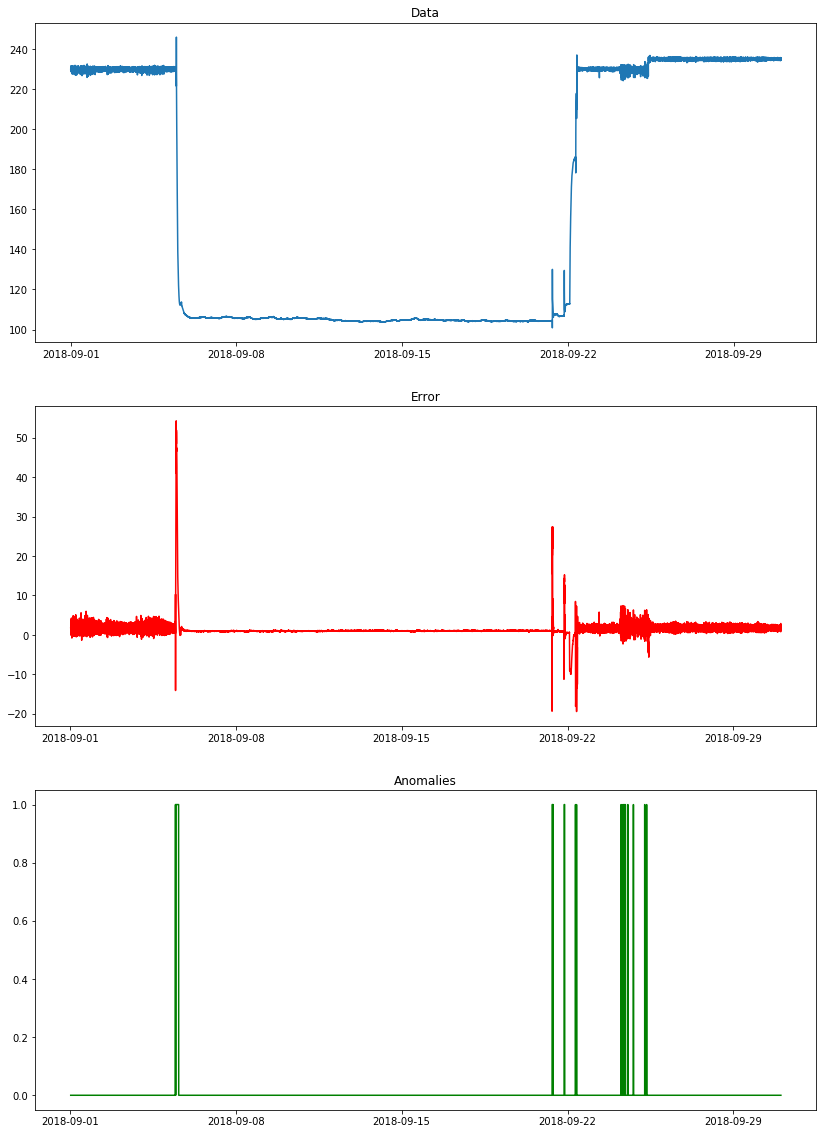

In [42]:
plt.figure(figsize=(14,20))
plt.subplot(3,1,1)
plt.title('Data')
plt.plot(data.index, data.iloc[:,i])

plt.subplot(3,1,2)
plt.title('Error')
plt.plot(data.index[prev_steps:], errors, color='red')

plt.subplot(3,1,3)
plt.title('Anomalies')
plt.plot(data.index[prev_steps:], anomalies, color='green')


In [ ]:
eror